# WhatsApp Chat Analysis

You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.
- Then scroll to the bottom and top on Export Chat.
- Then select without media for simplicity if it asks you whether you want your chats with or without media.
- Then email this chat to yourself and download it to your system.
So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.

In [ ]:
#pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline


In [ ]:
def startsWithDateAndTime(s):
    pattern = r"[\d]{1,2}/[\d]{1,2}/[\d]{4}" #, r"([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -" # [\d]{1,2}/[\d]{1,2}/[\d]{4} ^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)
    result = re.findall(pattern, s)
    print("result :", result)
    if result:
        return True
    else:
        False



In [ ]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [ ]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [ ]:
#pip install google.colab

In [ ]:
from google.colab import files

# uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = "/content/WhatsAppYogi.txt" # path for the whatsapp text file
with open(conversation, encoding="utf-8") as fp:

    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print("fp.readline() : \n", fp.readline())
    messageBuffer = []
    print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        print("line: \n", line)
        if startsWithDateAndTime(line):
            print("startsWithDateAndTime : \n", startsWithDateAndTime)
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getDataPoint(line)
                messageBuffer.append(message)

        else:
            messageBuffer.append(line)


Streaming output truncated to the last 5000 lines.
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/2020, 00:40 - Yogi: 22
result : ['16/11/2020']
startsWithDateAndTime : 
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/2020, 00:40 - Yogi: Kaise be
result : ['16/11/2020']
startsWithDateAndTime : 
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/2020, 00:40 - Mukund: Kiska
result : ['16/11/2020']
startsWithDateAndTime : 
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/2020, 00:41 - Yogi: Tera 26 ho gaya naa
result : ['16/11/2020']
startsWithDateAndTime : 
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/2020, 00:41 - Mukund: Ha
result : ['16/11/2020']
startsWithDateAndTime : 
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/2020, 00:41 - Mukund: 3 account open kiya hai
result : ['16/11/2020']
startsWithDateAndTime : 
 <function startsWithDateAndTime at 0x7cf3da40c940>
line: 
 16/11/20

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

<ipython-input-11-17d7bb7522ce>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Time,Author,Message
2076,2024-01-19,13:19,Mukund,Abe sale tu usko puchega kya
2077,2024-01-19,13:20,Mukund,O jitna bank ko degi utna hi lunga na thoda
2078,2024-01-19,13:28,Yogi,Haa ruk ja batata hh
2079,2024-01-19,13:28,Yogi,Tu address bhej tab tak
2080,2024-01-19,22:20,Mukund,Bhai tu call kyu nhi utha rha hai Bura laga kya
2081,2024-01-25,12:28,Yogi,Bhai sun na
2082,2024-01-25,12:28,Yogi,20 bhej na muje or
2083,2024-01-25,13:21,Mukund,20 rupee kya karega lege
2084,2024-01-25,13:21,Mukund,Cigarette Pina hai kya
2085,2024-01-25,13:39,Yogi,Mc 😂😂


In [ ]:
df.Author.unique()

array([None, 'Mukund', 'Yogi'], dtype=object)

In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
# print(media_messages)

def split_count(text):
    data = re.findall(r'\X', text)
    emoji_list = []

    for word in data:
      emojis = emoji.distinct_emoji_list(word)
      emoji_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

    # emoji_list = []
    # for word in data:
    #   if any(char in emoji.distinct_emoji_list for char in word):
    #     emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
# print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
# print("Data science Community")
# print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Media: 243
Emojis: 537
Links: 86


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['a','b','c'] # list of the authors name in the group

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    # req_df will contain messages of only one particular user
    print('\n')
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])
    print('Links Sent', links)
    # print('\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 2095
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1852 non-null   datetime64[ns]
 1   Time      1852 non-null   object        
 2   Author    1764 non-null   object        
 3   Message   1853 non-null   object        
 4   emoji     1853 non-null   object        
 5   urlcount  1853 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 101.3+ KB


Stats of a -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of b -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of c -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


<ipython-input-17-34d05a4f304b>:19: RuntimeWarning: invalid value encountered in long_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [ ]:

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

(':face_with_tears_of_joy:', 251)
(':unamused_face:', 38)
(':grinning_face_with_sweat:', 27)
(':smiling_face_with_smiling_eyes:', 26)
(':pensive_face:', 15)
(':rolling_on_the_floor_laughing:', 13)
(':smirking_face:', 12)
(':face_with_monocle:', 12)
(':partying_face:', 11)
(':sleeping_face:', 11)
(':enraged_face:', 10)
(':love-you_gesture_light_skin_tone:', 10)
(':thumbs_up:', 9)
(':winking_face_with_tongue:', 8)
(':thinking_face:', 8)
(':face_screaming_in_fear:', 7)
(':confused_face:', 6)
(':loudly_crying_face:', 4)
(':backhand_index_pointing_down:', 4)
(':folded_hands:', 4)
(':fearful_face:', 4)
(':party_popper:', 4)
(':winking_face:', 3)
(':goblin:', 3)
(':OK_hand_light_skin_tone:', 3)
(':grinning_face_with_smiling_eyes:', 2)
(':exploding_head:', 2)
(':grinning_face_with_big_eyes:', 2)
(':smiling_face:', 2)
(':crying_face:', 2)
(':thumbs_up_light_skin_tone:', 2)
(':face_with_rolling_eyes:', 2)
(':zany_face:', 1)
(':smiling_face_with_heart-eyes:', 1)
(':smiling_face_with_open_hands:',

There are 38568 words in all the messages.


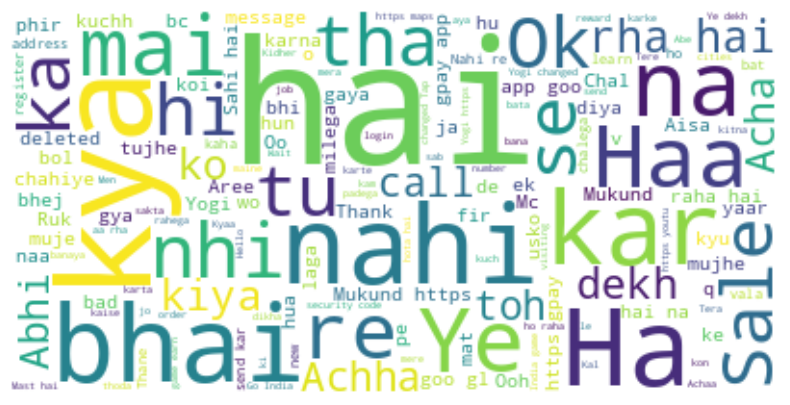

In [ ]:
#Ploting the Wordcloud
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
messages_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,NaT,None,None,😄😄🤪😂😍,"[:grinning_face_with_smiling_eyes:, :grinning_...",0,6,2,1
1,2020-01-25,04:46,Mukund,😜😜😜😜,"[:winking_face_with_tongue:, :winking_face_wit...",0,4,1,1
3,2020-09-02,00:33,None,Yogi: https://youtu.be/0hpeiw3i-jQ,[],1,34,2,1
4,2020-09-02,00:33,Mukund,👍👍👍,"[:thumbs_up:, :thumbs_up:, :thumbs_up:]",0,3,1,1
5,2020-09-02,00:35,Mukund,😜😜😜,"[:winking_face_with_tongue:, :winking_face_wit...",0,3,1,1
...,...,...,...,...,...,...,...,...,...
2088,2024-01-25,13:44,Mukund,Ok kal deta hun,[],0,15,4,1
2089,2024-01-25,13:44,Yogi,Chslega,[],0,7,1,1
2090,2024-01-26,12:17,Yogi,Bhai bhej naa,[],0,13,3,1
2093,2024-01-27,20:17,Yogi,Mereko bata calculate karke,[],0,27,4,1


Author name Yogi


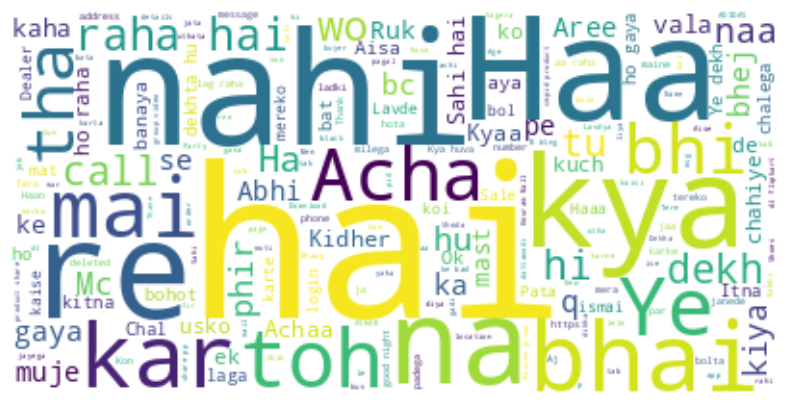

Author name Mukund


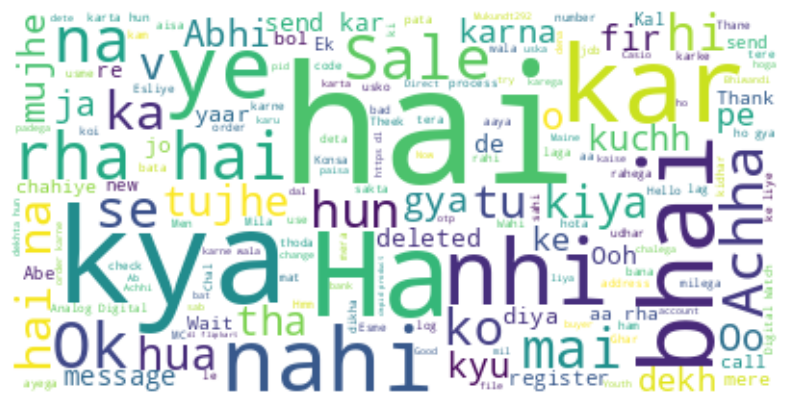

In [ ]:
#Wordcloud Auther wise
l = ['Yogi','Mukund']

for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()